In [1]:
import  sys; sys.path.append("../src")
from indirect import Indirect
from optimisation import conds
import numpy as np, matplotlib.pyplot as plt
%matplotlib

Using matplotlib backend: Qt5Agg


In [ ]:
# plot all nominal energy optimal trajectories
for cond in conds:
    fname = "../data/nominal_energy/" + str(cond) + ".npy"
    try:
        dv = np.load(fname)
    except:
        continue
    print(dv)
    seg = Indirect(*cond)
    tl, xl, ul = seg.propagate(*seg.decode(dv), 0, controls=True)
    seg.plot_traj(xl)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fcbe86df358>,
      dtype=object)

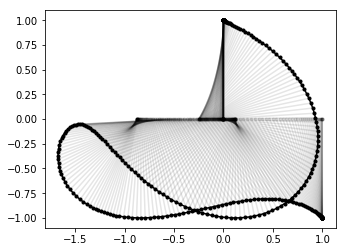

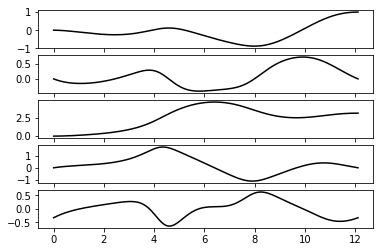

In [7]:
# sample nominal trajectory
x0 = [0,0,0,0]
xf = [1,0,np.pi,0]
nedir = "../data/nominal_energy/"
dv = np.load(nedir + str((x0,xf)) + ".npy")
seg = Indirect(x0, xf)
tl, xl, ul = seg.propagate(*seg.decode(dv), 0, controls=True)
ax = seg.plot_traj(xl)
seg.plot_timeline(tl, xl, ul)

In [3]:
# slice trajectory
Tls, xls = seg.sample_traj(tl, xl)

In [4]:
# sample from sample
T, xl0 = Tls[5], xls[5,:]
xl0

array([-0.23460736,  0.08884526,  0.7705188 ,  0.64177087, -0.01860099,
       -0.21623412, -0.5159741 ,  0.40821489])

In [5]:
res = seg.random_walk(T, xl0, 0, verbose=True, npts=6)

Beginning random walk from [-0.23460736  0.08884526  0.7705188   0.64177087 -0.01860099 -0.21623412
 -0.5159741   0.40821489]
Feasible! dx now 0.02
Feasible! dx now 0.04
Feasible! dx now 0.08
Not feasible! dx now 0.04
Not feasible! dx now 0.02
Feasible! dx now 0.04
Feasible! dx now 0.08
Not feasible! dx now 0.04
Feasible! dx now 0.08


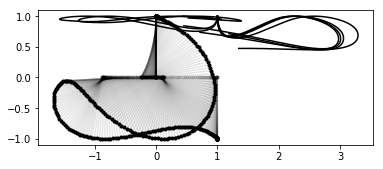

In [14]:
fig, ax = plt.subplots(1)
for traj in res:
    x = traj[:,1] + np.sin(traj[:,3])
    y = np.cos(traj[:,2])
    ax.plot(x, y, "k-")
seg.plot_traj(xl, ax=ax)

In [ ]:
*